In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D


# Load the dataset if the data is in same directory with the notebook
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
## if the data is in diffrent directory
## data  = pd.read_csv(r"C:\Users\suvshaw\Videos\Notes\04 ML\07 DBSCAN\healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



For the exploratory data analysis (EDA), we will proceed with the following steps:

1. **Univariate Analysis:** Inspect each variable individually to understand its distribution and potential outliers.

2. **Bi variate Analysis:** Explore the relationship between each variable and the target variable stroke.


## Univariate Analysis

### Target Variable

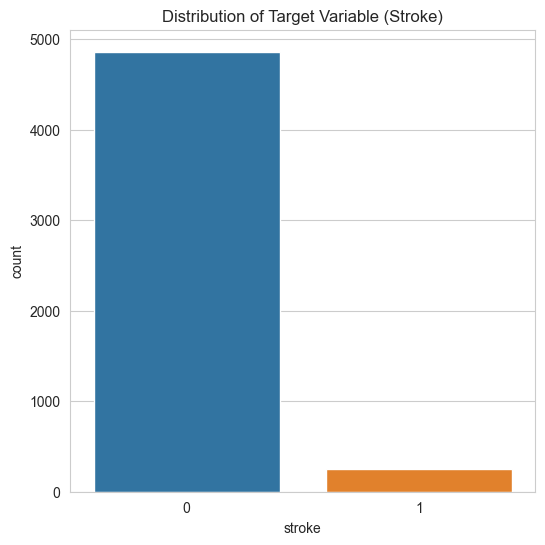

In [ ]:
# Set the style of all graphs to seaborn
sns.set_style("whitegrid")

# Plot the target variable 'stroke'
plt.figure(figsize=(6, 6))
sns.countplot(x=data['stroke'])
plt.title('Distribution of Target Variable (Stroke)')
plt.show()

### Interpretation of Results:

The target variable '**stroke**' is highly imbalanced with a lot more instances of class **0** (no stroke) than class **1** (stroke). This is an important observation as it will affect the choice of machine learning model and evaluation metric.

### Category Vairables


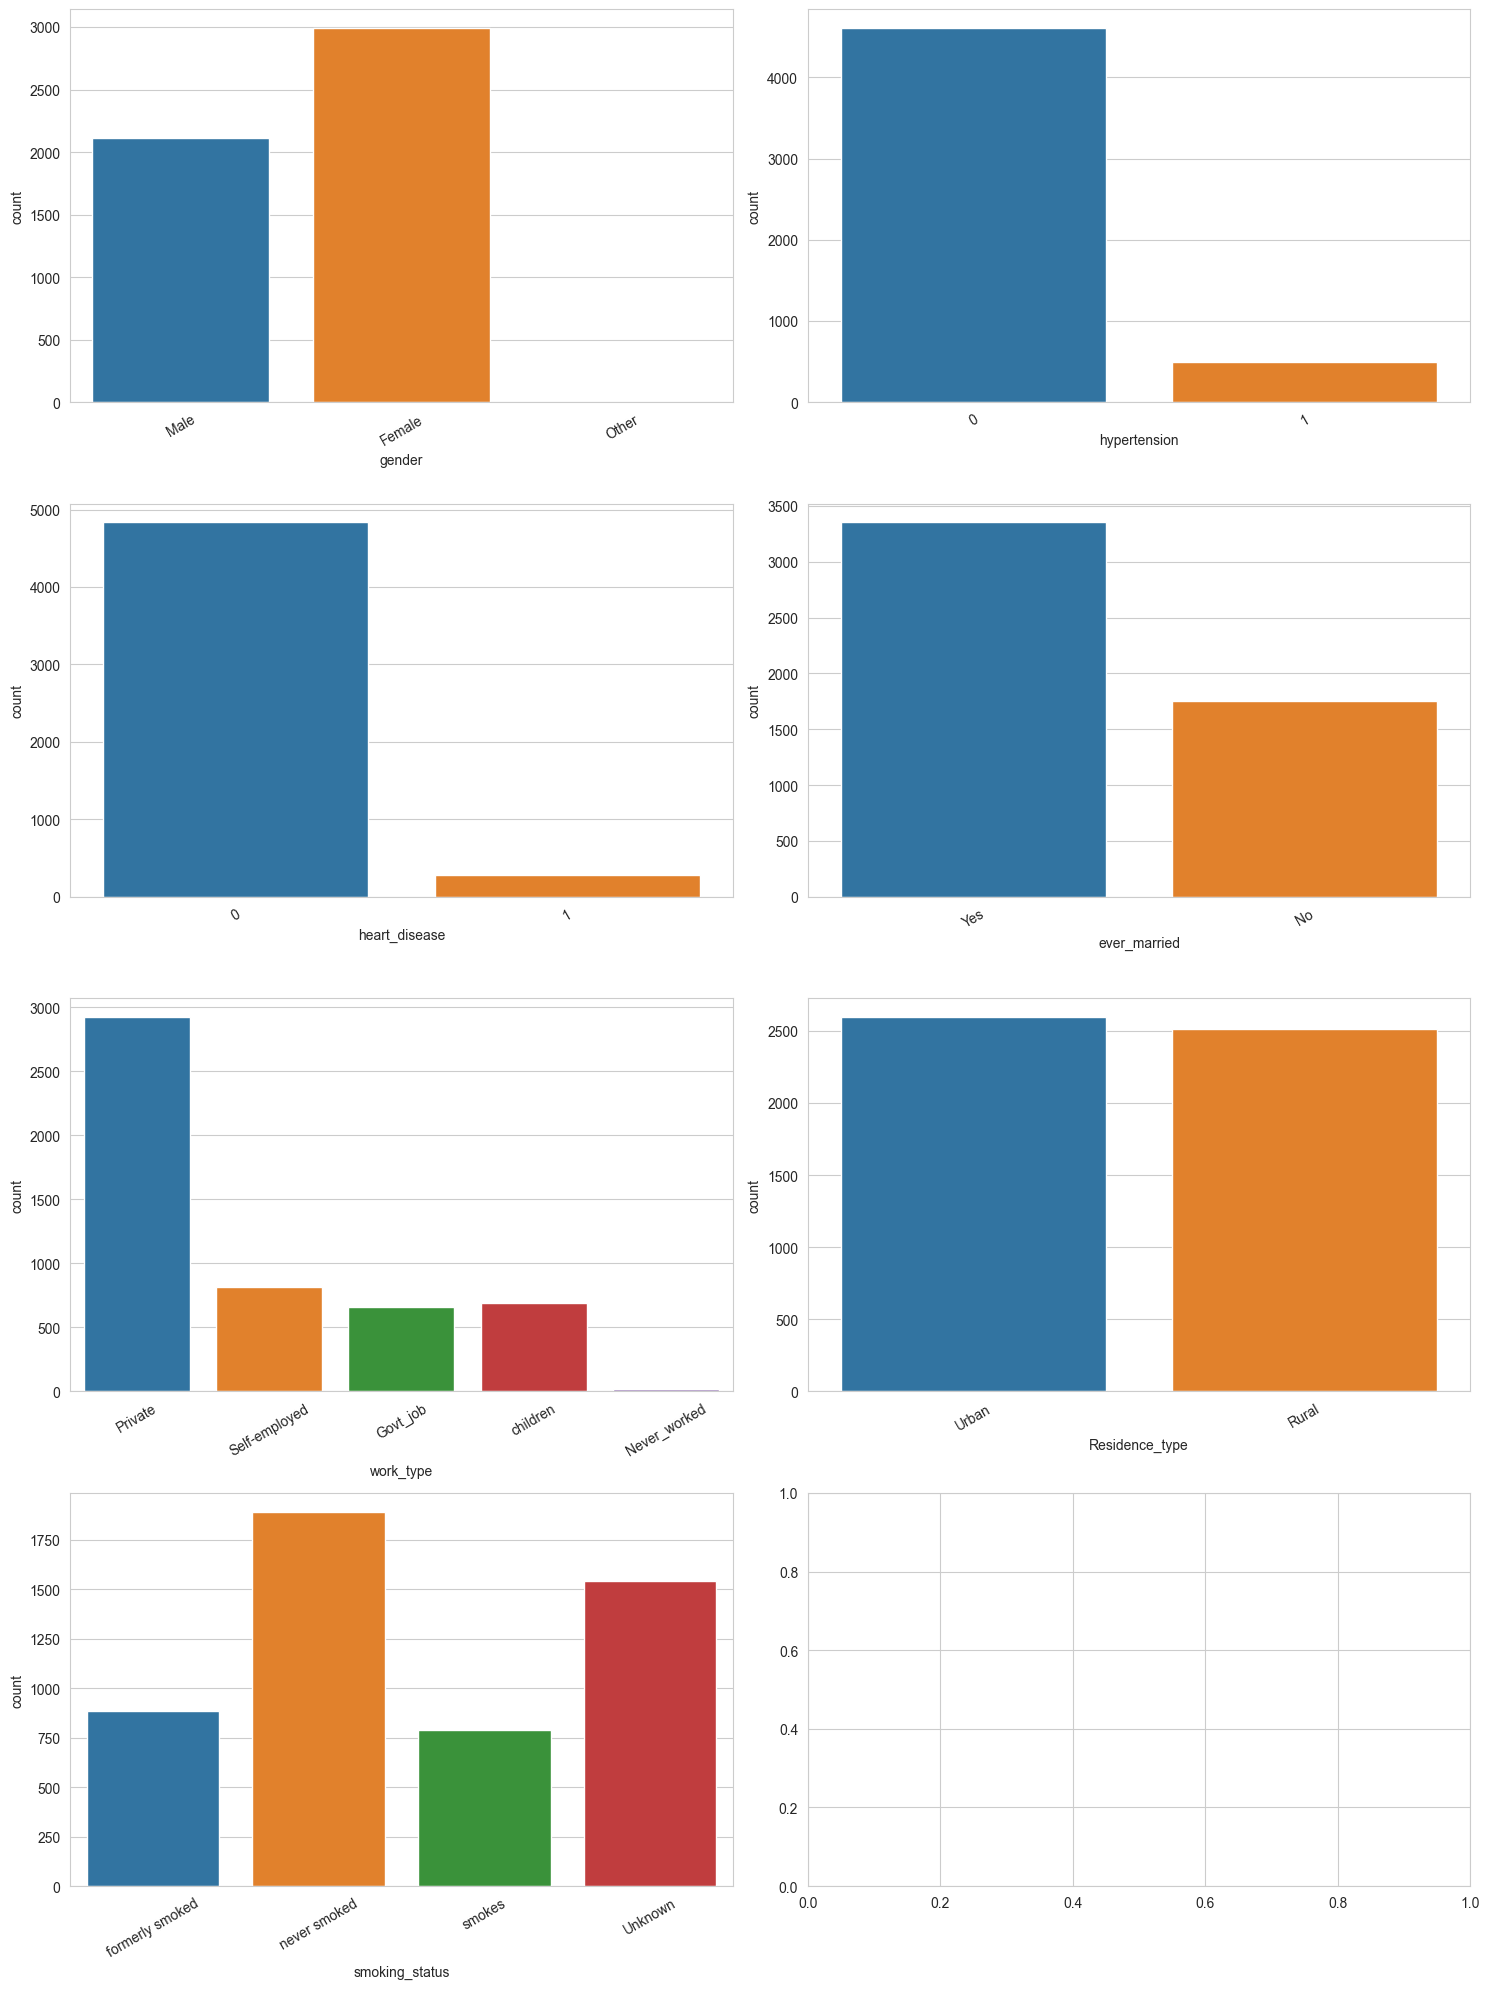

In [ ]:

# List of categorical variables
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plotting the bar plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  # Create a figure with 4 rows and 2 columns of subplots

# Iterate through the categorical variables and their corresponding subplot axes
for var, subplot in zip(categorical_variables, axs.flatten()):  # axs.flatten() flattens the 2D array of axes
    sns.countplot(x=var, data=data, ax=subplot)  # Create a countplot for the current variable
    for label in subplot.get_xticklabels():
        label.set_rotation(30)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust subplot spacing
plt.show()  # Display the plot

###  Interpretation of Results:

Here are the key observations from the distribution of categorical variables:

- **gender**: There are more `female` than `male` patients, and a very small number of patients identify as `Other`.

- **hypertension**: The majority of patients do not have `hypertension`.

- **heart_disease**: The majority of patients do not have `heart disease`.

- **ever_married**: Most of the patients have been `married at least once`.

- **work_type**: Most of the patients are in the `Private` work category. There are also significant numbers in `Self-employed` and `children`. The categories `Govt_job` and `Never_worked` have fewer patients.

- **Residence_type**: The number of patients living in `urban` and `rural areas` is almost equal.

- **smoking_status**: Most of the patients have `never smoked`. The categories `formerly smoked` and `smokes` have fewer patients. There's a significant portion of patients with `Unknown` smoking status.


Next, let's look at the distribution of the continuous variables: **age**, **avg_glucose_level**, and **bmi**. We'll use histograms and boxplots for this.


###  Continous Vairables


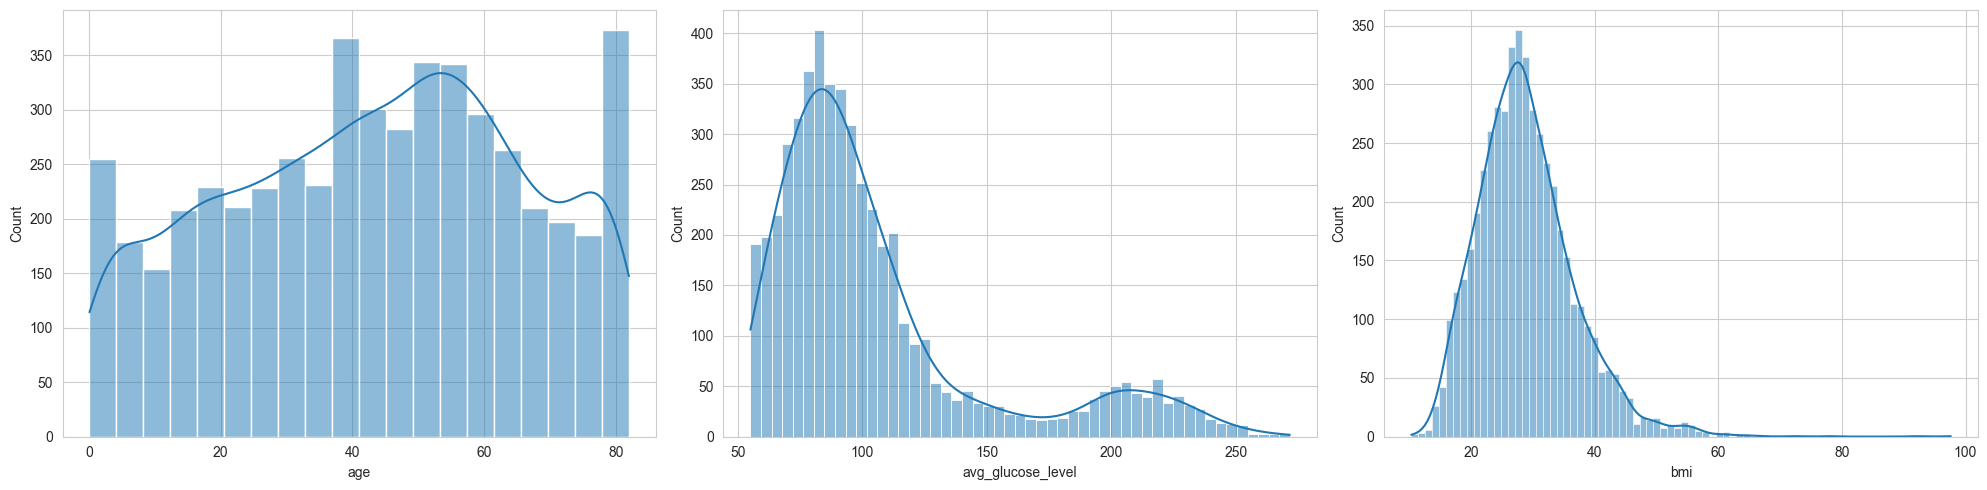

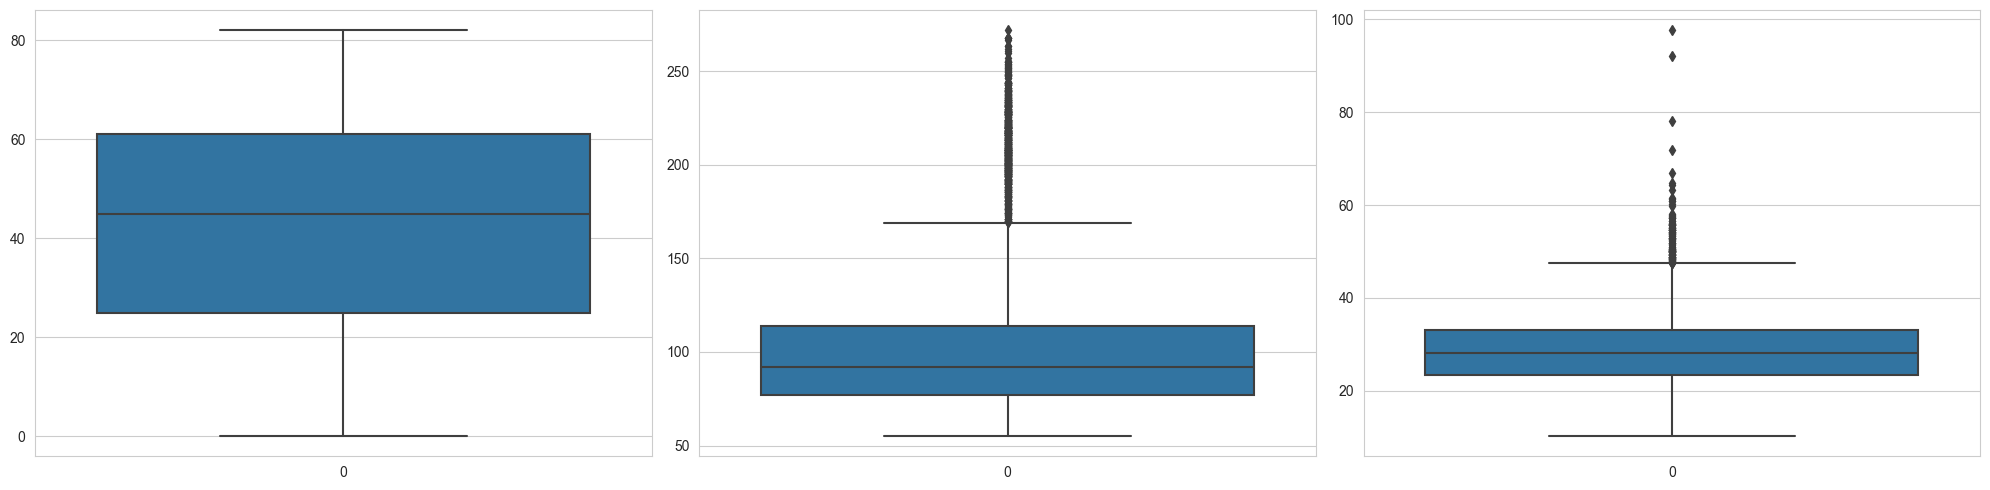

In [ ]:
# List of continuous variables
continuous_variables = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(data[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(data[var], ax=subplot)

plt.tight_layout()
plt.show()

###  Interpretation of Results:

Here are the key observations from the distribution of continuous variables:

- **age**: The age of the patients varies from young to old, with the majority of patients being in the range of **40-80 years**.

- **avg_glucose_level**: Most patients have an average glucose level in the range of **50-125**, but there are also many patients with higher levels. The distribution is right-skewed.

- **bmi**: The majority of patients have a BMI in the range of **20-40**, which is considered normal to overweight. There are some outliers with extremely high BMI values.


Now bivariate analysis. This involves looking at the relationship between the target variable stroke and each of the other variables. For the categorical variables, we'll use count plots split by the target variable. For the continuous variables, we'll use box plots or violin plots split by the target variable. Let's start with the categorical variables.
    







## Bivariate Analysis

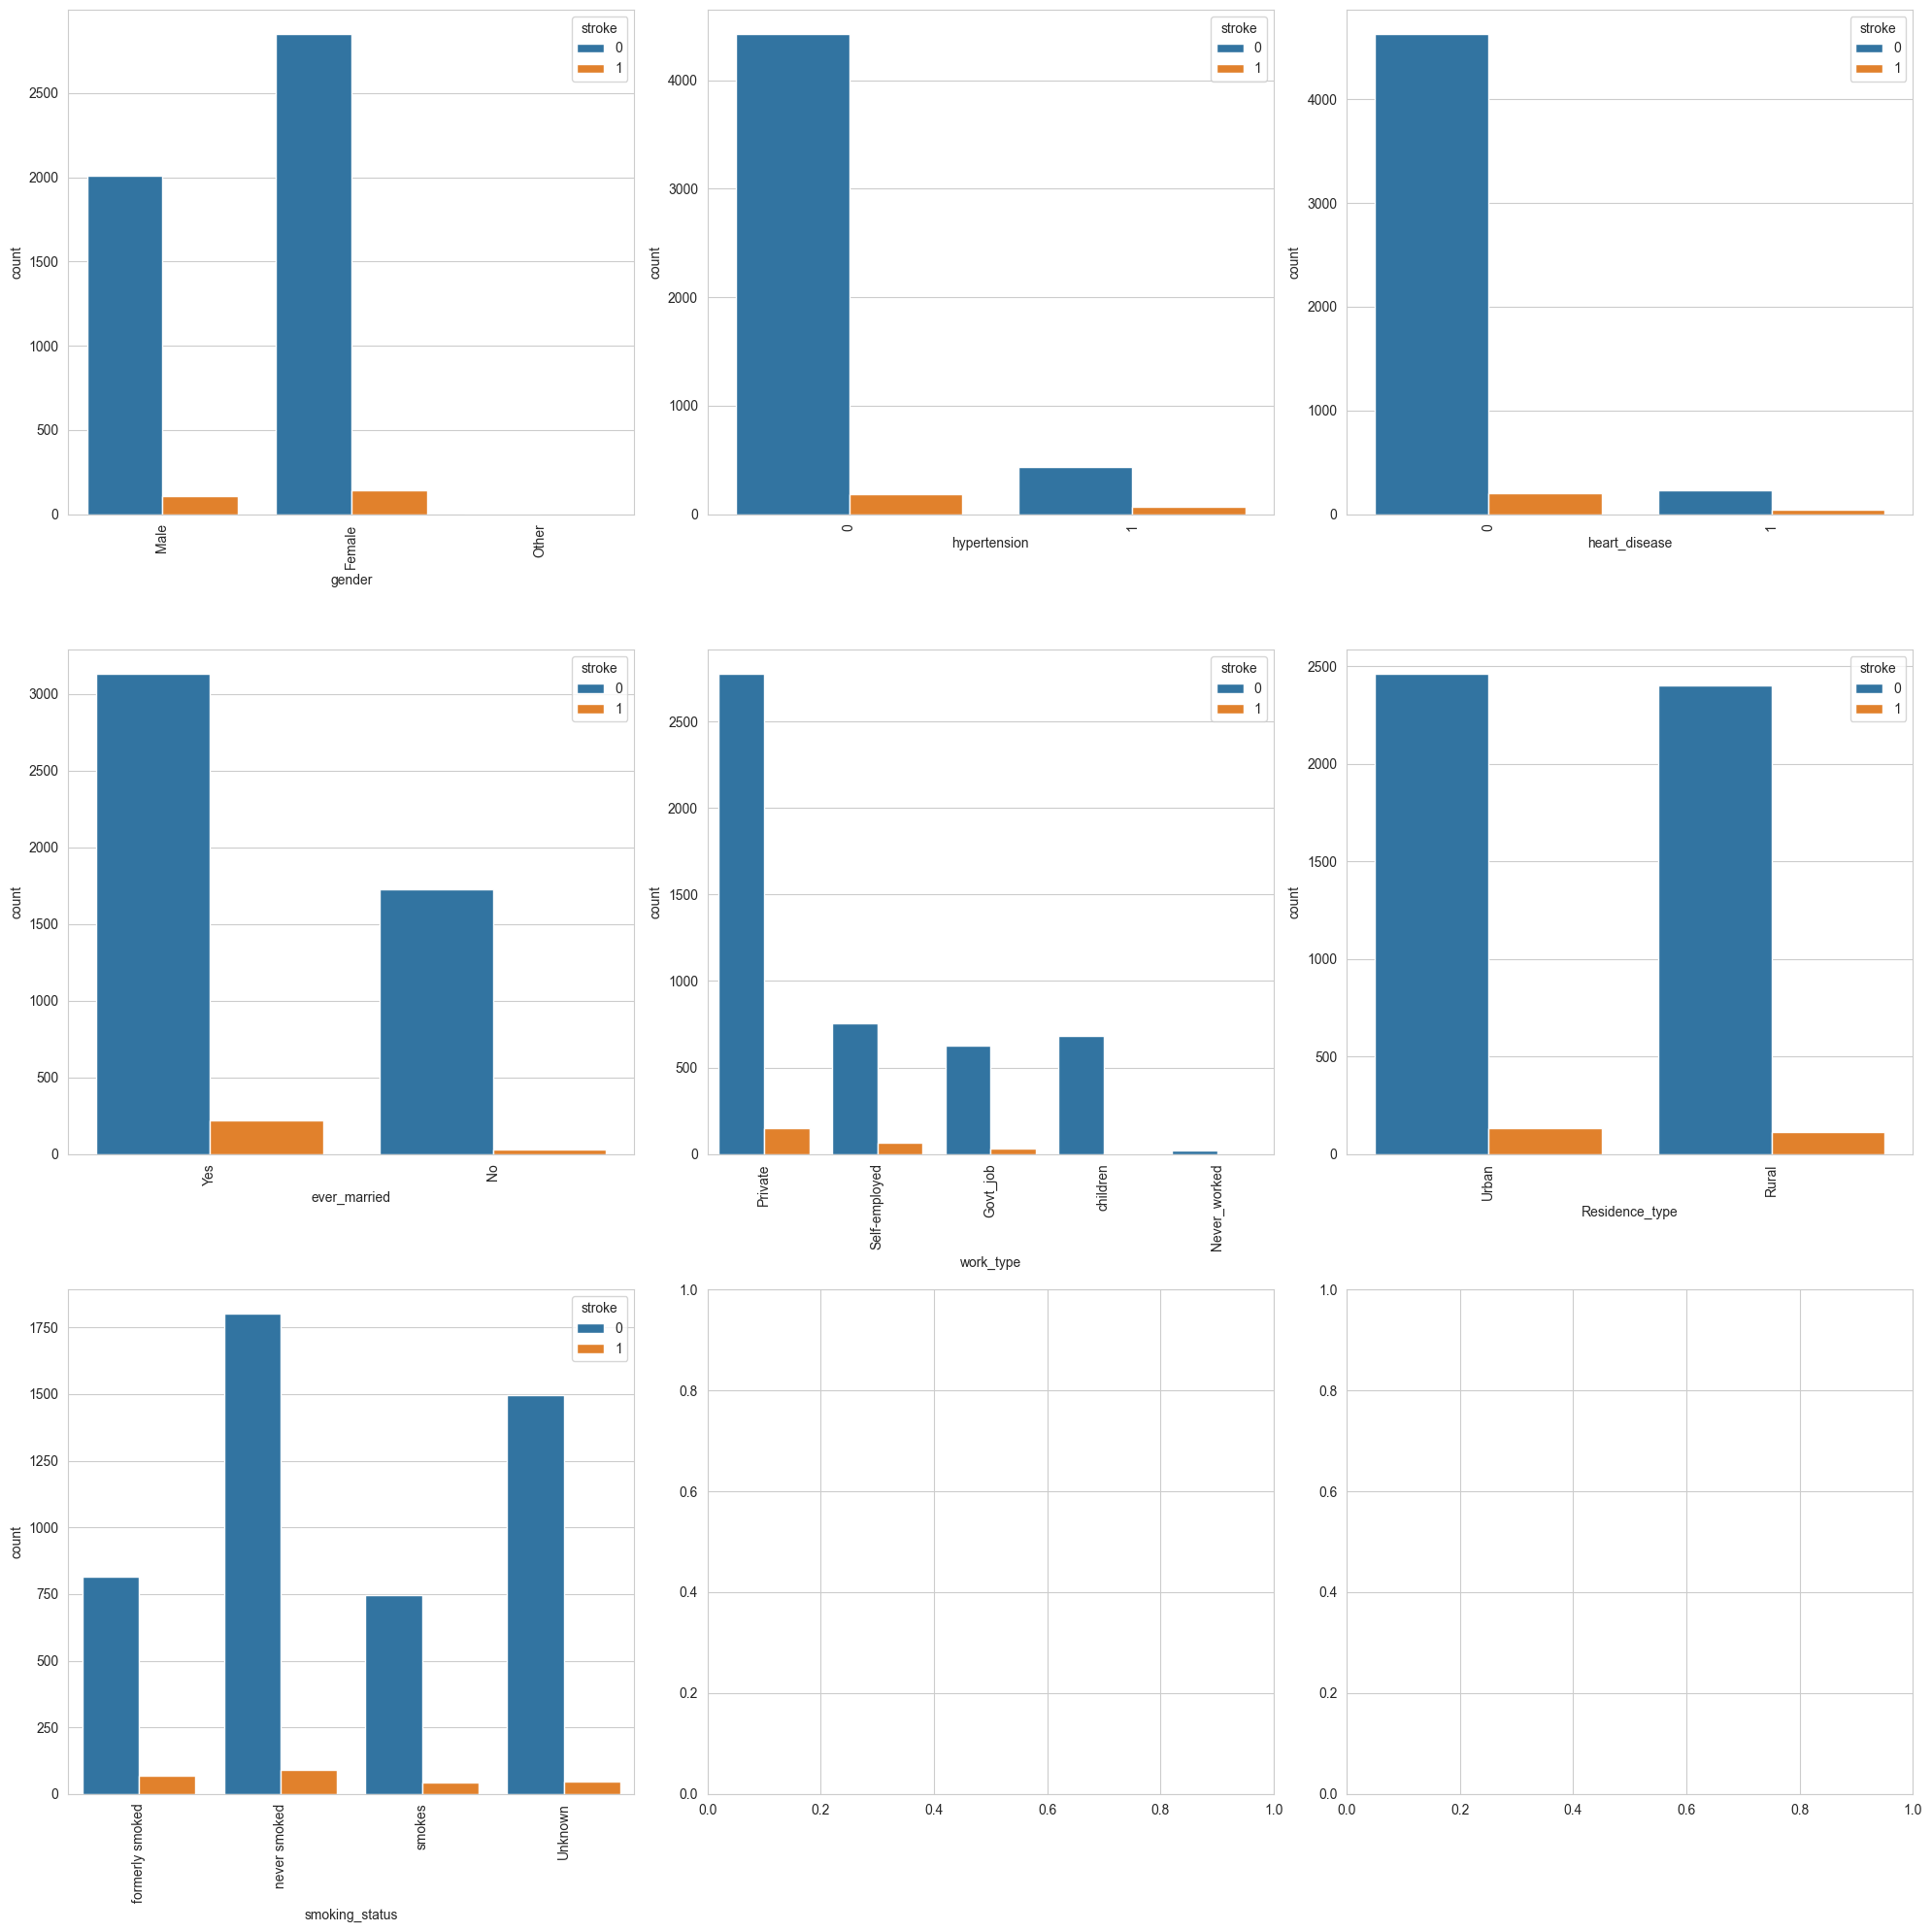

In [ ]:
# Plot the categorical variables against the target variable 'stroke'
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=data[var], hue=data['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

### Interpretation of Results:

Observations from the **bivariate analysis** with the **categorical variables**:

- **gender**: Both `males` and `females` have a similar proportion of stroke cases, with males having slightly more. The `Other` category has no stroke cases, but this could be due to the very small sample size for this category.

- **hypertension**: Patients with `hypertension` have a **higher** proportion of stroke cases than those without hypertension.

- **heart_disease**: Patients with `heart disease` also have a **higher** proportion of stroke cases than those without heart disease.

- **ever_married**: Those who have been ``married`` have a **higher** proportion of stroke cases than those who have not.

- **work_type**: Patients who are `self-employed` or work in `private jobs` have a **higher proportion** of stroke cases compared to other work types.

- **Residence_type**: The proportion of stroke cases is almost **equal** for both `urban` and `rural` residents.

- **smoking_status**: The proportion of stroke cases is **higher** for patients who `formerly smoked` or `currently smoke` compared to those who never smoked. The stroke proportion for the 'Unknown' category is lower.

Next, let's look at how the continuous variables relate to the target variable 'stroke'. We'll use violin plots for this analysis.
    





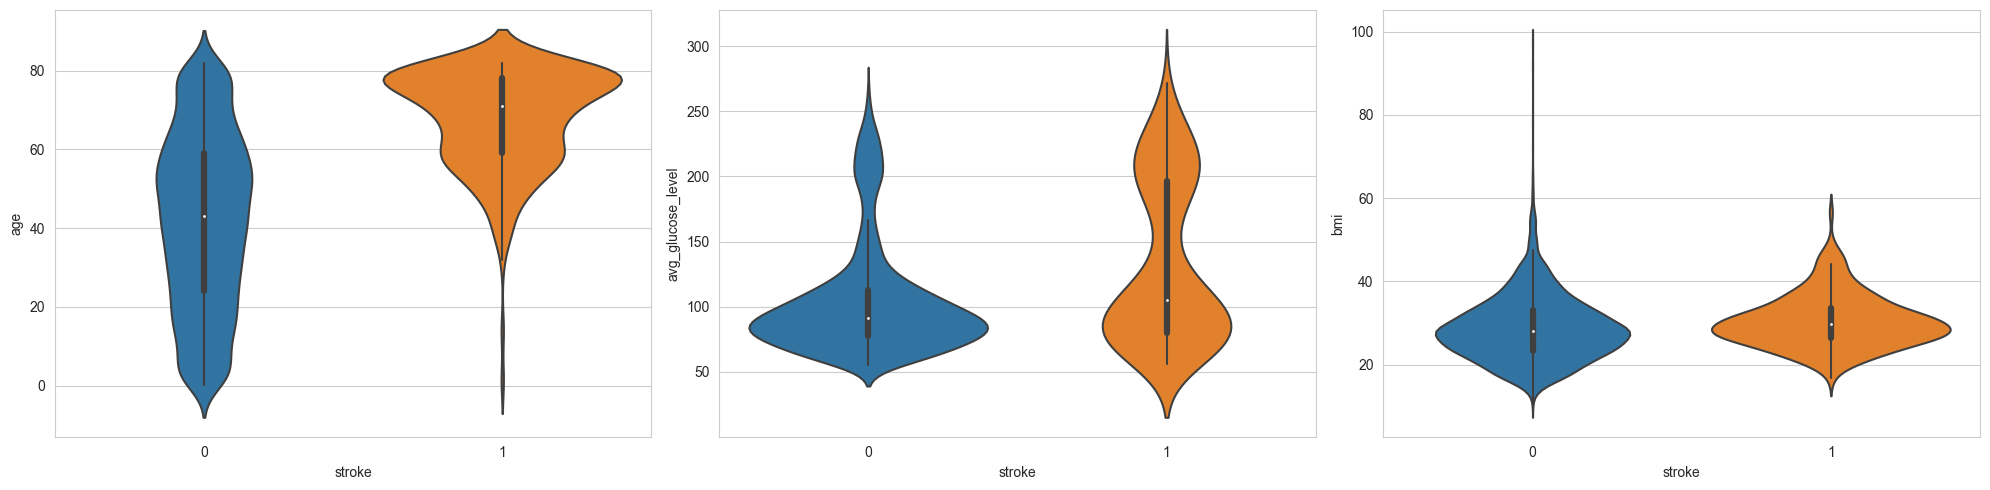

In [ ]:
# Plot the continuous variables against the target variable 'stroke'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.violinplot(x=data['stroke'], y=data[var], ax=subplot)

plt.tight_layout()
plt.show()

### Interpretation of Results:

Observations from the bivariate analysis with the continuous variables:

- **age**: Stroke cases are more common in older patients. The median age of stroke patients appears to be higher than that of non-stroke patients.

- **avg_glucose_level**: Stroke patients seem to have a higher average glucose level than non-stroke patients. There is a wider distribution of glucose levels among stroke patients.

- **bmi**: The BMI distributions for stroke and non-stroke patients are quite similar, suggesting that BMI might not be a strong predictor for stroke.


Finally, let's move on to the multivariate analysis. This involves looking at the relationships between multiple variables at once. We can use a correlation matrix to see how the continuous variables relate to each other and to the target variable stroke. For the categorical variables, we can use a pairplot or a scatterplot matrix, but given the number of categories in some variables, this might not be very clear. Let's start with the correlation matrix.
    

## ***Multivariate Analysis***

In [ ]:
# Re-load the original dataset
data_original = pd.read_csv('healthcare-dataset-stroke-data.csv')
data_original = data_original.drop("id",axis=1)

# Select categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply one-hot encoding to the categorical columns
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(data_original[categorical_cols])

# Convert the one-hot encoded array into a dataframe
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the dataset
data_original.drop(categorical_cols, axis=1, inplace=True)

# Concatenate the original dataframe with the one-hot encoded dataframe
data_one_hot_encoded = pd.concat([data_original, one_hot_encoded_df], axis=1)

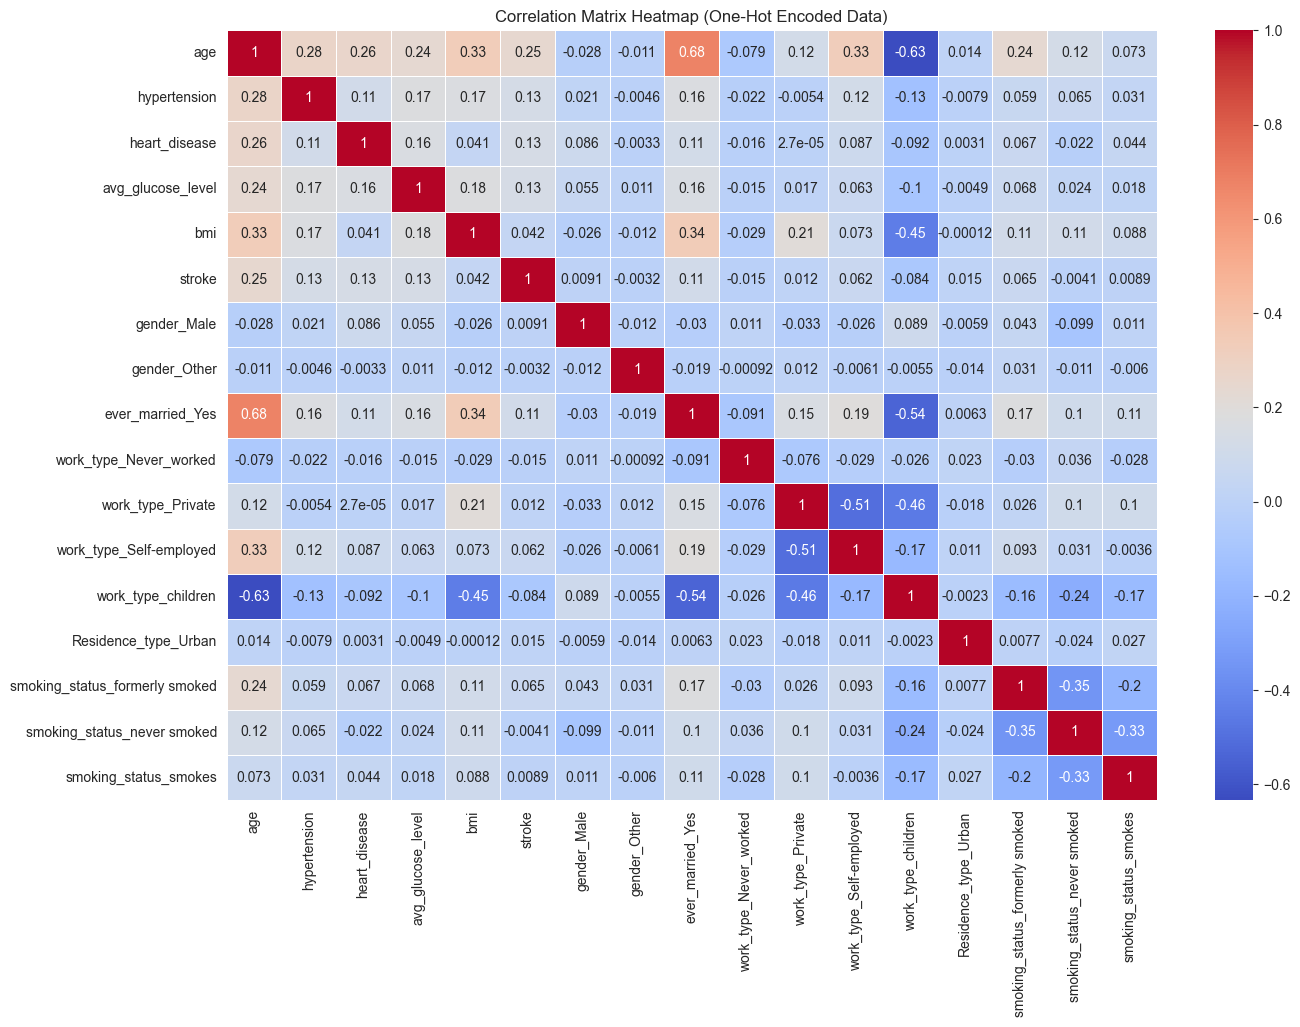

In [ ]:
# Compute the correlation matrix for the one-hot encoded data
correlation_matrix_one_hot = data_one_hot_encoded.corr()

# Plot the heatmap for the entire correlation matrix
plt.figure(figsize=(15, 10))
## for getting correlation value in the cells of the heatmap add annot=True
sns.heatmap(correlation_matrix_one_hot, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (One-Hot Encoded Data)")
plt.show()

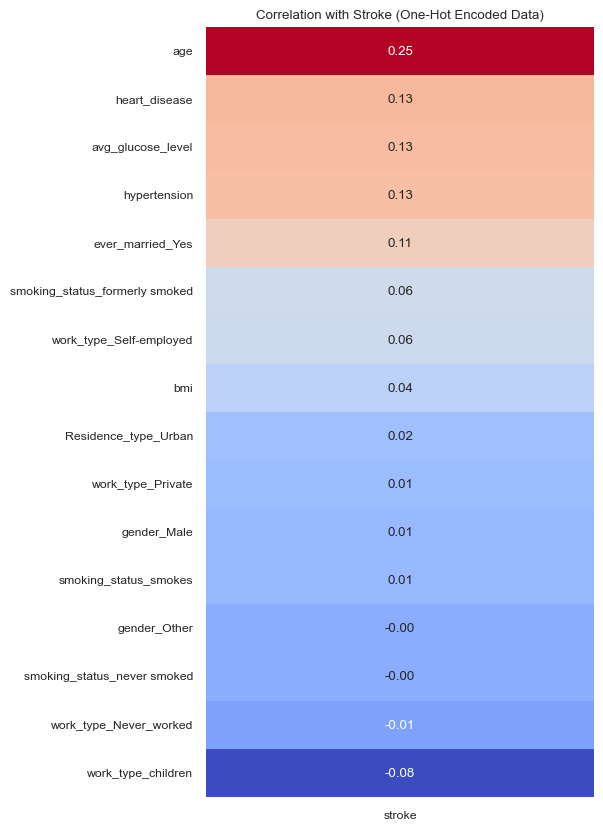

In [ ]:
# Compute the correlation of each feature with the target variable 'stroke'
target_corr_one_hot = correlation_matrix_one_hot['stroke'].drop('stroke')

# Sort correlation values in descending order
target_corr_sorted_one_hot = target_corr_one_hot.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target column
plt.figure(figsize=(5, 10))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted_one_hot.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Stroke (One-Hot Encoded Data)')
plt.show()

### Interpretation of Results:

**Overall Correlation Heatmap** : The first heatmap provides a visualization of the correlation between all pairs of features in the dataset. The color of each cell represents the correlation coefficient between the pair of variables: 🔵 for positive correlation and 🔴 for negative correlation. The darker the color, the stronger the correlation.

**Correlation with the Target Variable 'Stroke'** : The second heatmap ranks the features based on their correlation with the target variable `stroke`.

From the second heatmap, we can make several observations:

1. The `age` feature shows the highest positive correlation with the `stroke` target variable. This suggests that older people might be at a higher risk of having a stroke, which aligns with known medical observations.

2. The `hypertension` and `heart_disease` features also have positive correlations with `stroke`, indicating that people with hypertension or heart disease could be more likely to have a stroke.

3. `avg_glucose_level` and `ever_married_Yes` also show positive correlations, suggesting that higher average glucose levels and being married might be associated with a higher likelihood of a stroke.

4. The `work_type_Self-employed` and `gender_Male` features show positive correlations, indicating that self-employed individuals and males might be more likely to have a stroke.

5. On the other hand, features such as `work_type_children` and `Residence_type_Urban` show negative correlations with `stroke`, suggesting that these factors might be associated with a lower likelihood of having a stroke.





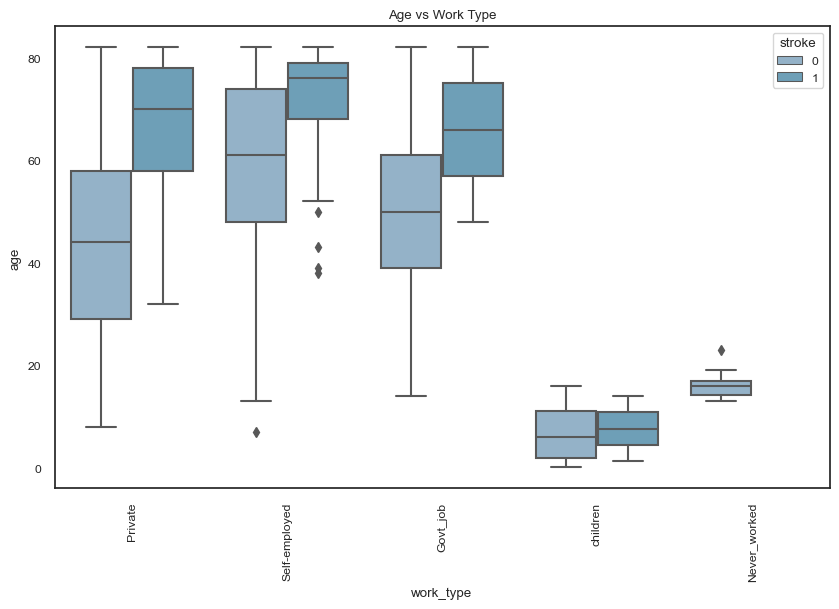

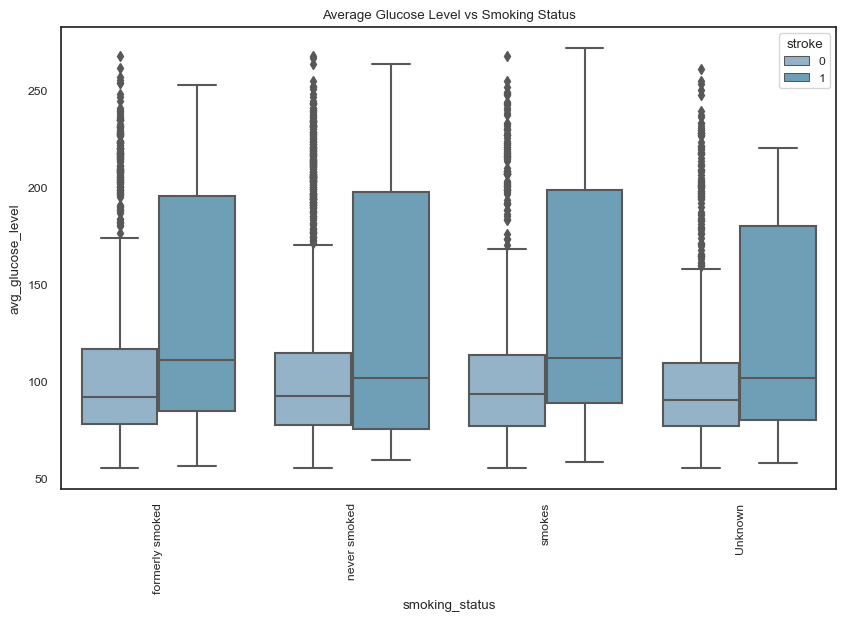

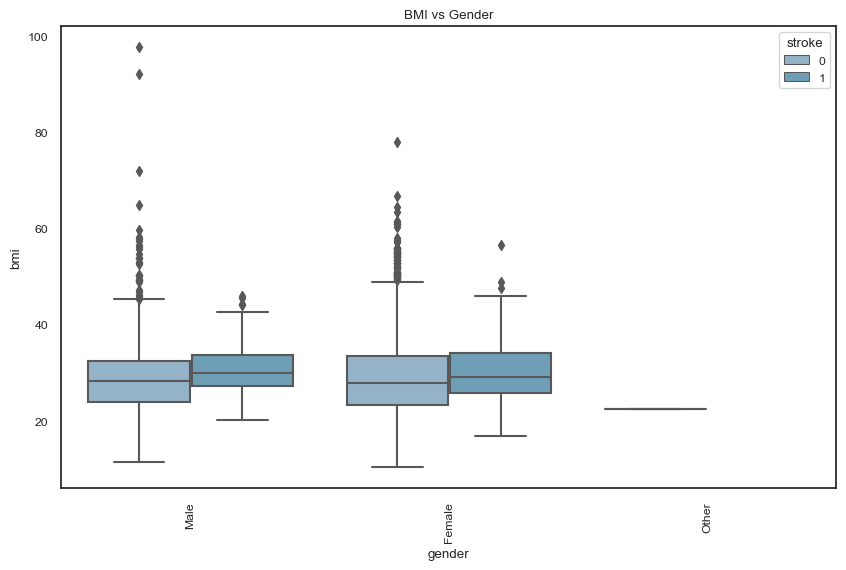

In [ ]:
# Boxplot of 'age' vs 'work_type'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['work_type'], y=data['age'], hue=data['stroke'])
plt.title('Age vs Work Type')
plt.xticks(rotation=90)
plt.show()

# Boxplot of 'avg_glucose_level' vs 'smoking_status'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['smoking_status'], y=data['avg_glucose_level'], hue=data['stroke'])
plt.title('Average Glucose Level vs Smoking Status')
plt.xticks(rotation=90)
plt.show()

# Boxplot of 'bmi' vs 'gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['gender'], y=data['bmi'], hue=data['stroke'])
plt.title('BMI vs Gender')
plt.xticks(rotation=90)
plt.show()

### Interpretation of Results:

- **Age vs Work Type**: Older people, particularly those who are self-employed or in private jobs, seem to have a higher incidence of stroke. The median age of stroke patients is highest in the self-employed category. For children, stroke cases are very rare.

- **Average Glucose Level vs Smoking Status**: The median glucose level for stroke patients is higher across all smoking status categories. Patients who formerly smoked or who currently smoke have a wider distribution of glucose levels, indicating more variability in these categories.

- **BMI vs Gender**: The BMI distributions for males and females are quite similar. The incidence of stroke doesn't seem to vary significantly with BMI within each gender. However, there are a few females with extremely high BMI who have experienced a stroke.


Next, let's examine the distribution of age, average glucose level, and bmi in patients with and without stroke using a pairplot. A pairplot will allow us to visualize the pairwise relationships between these three variables, separated by stroke status. This is a form of multivariate analysis. Let's generate the pairplot.




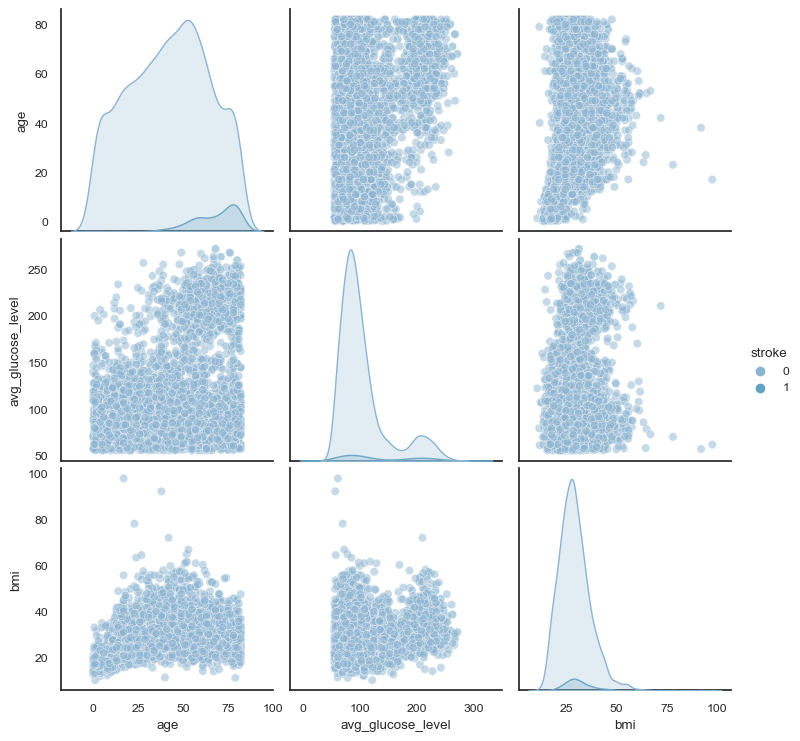

In [ ]:
# Subset the data for the pairplot
subset = data[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Convert 'stroke' to a categorical variable for the pairplot
subset['stroke'] = subset['stroke'].astype('category')

# Generate the pairplot
sns.pairplot(subset, hue='stroke', plot_kws={'alpha': 0.5})
plt.show()


### 🔍 Interpretation of Results:

The pairplot gives us a visual overview of the pairwise relationships and distributions of age, avg_glucose_level, and bmi, separated by stroke status. Here are some observations:

1. **age vs avg_glucose_level**: There's no clear relationship between age and average glucose level. However, stroke patients (denoted in orange) tend to be older and have higher glucose levels.

2. **age vs bmi**: There's no clear relationship between age and BMI. Stroke patients tend to be older, but their BMI doesn't differ significantly from non-stroke patients.

3. **avg_glucose_level vs bmi**: There's no clear relationship between average glucose level and BMI. However, stroke patients tend to have higher glucose levels, regardless of their BMI.

The diagonal plots show the distribution of each variable for stroke and non-stroke patients. They confirm our earlier findings from the univariate analysis: stroke patients tend to be older and have higher glucose levels, while their BMI distribution is similar to non-stroke patients.


Next, let's visualize the interactions between age, avg_glucose_level, bmi, and stroke using a 3D scatter plot. This can provide us with more insights into the relationships between these variables.





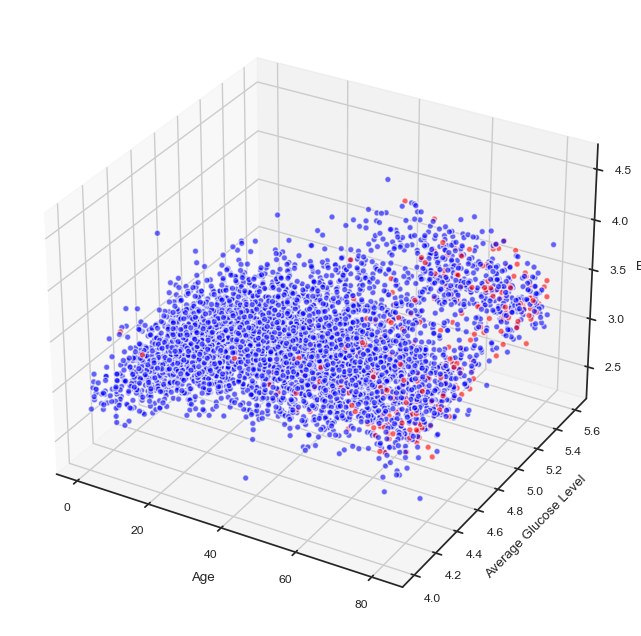

In [ ]:
# Create a color map for the 'stroke' variable
colors = data['stroke'].map({0:'blue', 1:'red'})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(data['age'], data['avg_glucose_level'], data['bmi'], c=colors, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
plt.show()


###  Interpretation of Results:

The 3D scatter plot provides a three-dimensional view of how `age`, `avg_glucose_level`, and `bmi` interact with each other with respect to the stroke status. The points are colored based on whether a patient had a stroke (red) or not (blue).

Here are the key observations:

- Stroke patients (red points) generally tend to be older and have higher glucose levels, which is consistent with our earlier findings.

- BMI does not appear to differentiate stroke patients from non-stroke patients as there is significant overlap in the BMI values of both groups.

This concludes our advanced visual exploratory data analysis. We've looked at a variety of plots, from basic distributions to interactions between multiple variables.


The target variable `stroke` is highly imbalanced with far more instances of class 0 (no stroke) than class 1 (stroke). This is an important observation as it will affect the choice of machine learning model and evaluation metric. ❗

Categorical variables such as `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` showed various distributions. Notably, hypertension and heart disease were found more frequently in patients who had a stroke.

Continuous variables (`age`, `avg_glucose_level`, `bmi`) exhibited different distributions. Age and average glucose level were found to be higher in stroke patients, but no significant difference in BMI was observed between stroke and non-stroke patients.

The bivariate and multivariate analyses showed that age and avg_glucose_level are potentially strong predictors of a stroke, as stroke patients tend to be older and have higher glucose levels.

The analyses also indicated that bmi might not be a strong predictor for stroke, as the distribution of BMI was similar for stroke and non-stroke patients.

From the advanced visualizations (FacetGrid and parallel coordinates plot), it was observed that older patients, particularly those who are self-employed or in private jobs, have a higher incidence of stroke. Also, stroke patients generally have higher glucose levels regardless of their work type and gender.




The EDA provided valuable insights into the factors associated with strokes. Age, hypertension, heart disease, and average glucose level appear to be significant factors, while BMI might not be a significant predictor. This information can guide the feature selection and modeling process. However, the imbalance in the target variable could present a challenge in building a predictive model. Techniques such as oversampling the minority class, undersampling the majority class, or using a combination of both (SMOTE) may be needed to handle this imbalance.

Also, while the EDA provided some valuable insights, it's important to note that correlation does not imply causation. A more thorough statistical analysis or experimental studies may be needed to determine causal relationships between these factors and strokes.

Finally, the EDA was limited to the available data and variables. There might be other important factors associated with strokes that were not included in this dataset, such as family history of stroke, diet, physical activity, alcohol consumption, and stress levels. Including these factors could provide a more comprehensive analysis.


### The data cleansing process should include the following steps:

1. **Check for and handle missing values**: Columns such as 'bmi' could have missing values that need to be filled in or the rows removed, depending on the specific circumstances.

2. **Check for and handle duplicates:** We need to ensure that there are no duplicated rows in the dataset. If duplicates exist, we will need to decide whether to keep one, keep all, or average the duplicates, depending on the specifics of the data and the research question.

3. **Check for and handle outliers:** Some columns, such as 'avg_glucose_level' and 'bmi', are numerical and may contain outliers that could distort the analysis. We should decide on a method to handle these, such as removing them or applying a transformation to reduce their impact.

4. **Convert categorical variables to appropriate data type:** Columns like 'gender', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status' are categorical. Depending on the analysis, we may need to convert these to dummy variables.

5. **Check for and handle incorrect values:** For example, 'age' should not be negative, 'hypertension' and 'heart_disease' should be 0 or 1, 'gender' should be 'Male' or 'Female', etc.



In [ ]:
# Load the data
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Check for missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The `bmi` column has **201** missing values. To handle these missing values, we have a few options:

1. **Remove the rows with missing values:** This is a good option if the number of missing values is relatively small, and we don't risk losing too much data. However, this method can introduce bias if the missing data is not random.

2. **Impute missing values:** This involves filling in the missing values based on other data. Common methods include using the **mean**, **median**, or **mode** of the column, or using a more complex method like regression or machine learning algorithms to predict the missing values.


 A common method is to fill in missing values with the median value of the column. This method is robust to outliers and is therefore a good choice for data that may be skewed or have extreme values. Let's proceed with this approach.


In [ ]:
# Fill missing values in 'bmi' with the median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# Check for missing values again to verify
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Duplicates

In [ ]:
# Remove ID Rows
data = data.drop('id',axis=1)

# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

num_duplicate_rows

0

There are no duplicate rows in our dataset, which is good news. ✔️


Next, let's check for outliers in our numerical columns. We will use the **Interquartile Range (IQR) method** to identify outliers. This method defines an outlier as any value that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. Here, Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).

We'll check for outliers in the `age`, `avg_glucose_level`, and `bmi` columns. We won't check `hypertension`, `heart_disease`, and `stroke` columns as they are binary.

Let's proceed with the outlier detection step.


In [ ]:
# Define a function to calculate the number of outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ((column < lower_bound) | (column > upper_bound)).sum()

# Check for outliers in 'age', 'avg_glucose_level', and 'bmi'
outliers = {column: count_outliers(data[column]) for column in ['age', 'avg_glucose_level', 'bmi']}

outliers

{'age': 0, 'avg_glucose_level': 627, 'bmi': 126}

The `avg_glucose_level` column has **627** outliers and the `bmi` column has **126** outliers, while `age` doesn't have any.

Outliers can distort the results of our analysis, so it's important to handle them properly. There are several strategies to handle outliers:

1. **Remove outliers:** This is the simplest method, but it can lead to loss of information if the number of outliers is high.

2. **Cap outliers:** This method involves setting a threshold and replacing any value above (or below) that threshold with the threshold value itself.

3. **Transform the data:** Techniques such as log transformation can reduce the impact of outliers.

4. **Leave them as is:** In some cases, the outliers might be genuine, interesting observations that we want to keep.

> Given that our dataset might not be large, removing the outliers might lead to significant loss of information. Therefore, we can either cap the outliers or transform the data.

For the 'avg_glucose_level' and 'bmi' columns, let's apply a log transformation as it is a common method to reduce the influence of outliers in skewed data. Before we do that, let's ensure there are no zero or negative values in these columns as log transformation is not defined for those.






In [ ]:
# Check for zero or negative values in 'avg_glucose_level' and 'bmi'
zero_or_negative_values = {column: (data[column] <= 0).sum() for column in ['avg_glucose_level', 'bmi']}

zero_or_negative_values

{'avg_glucose_level': 0, 'bmi': 0}

There are no zero or negative values in the `avg_glucose_level` and `bmi`


columns, so we can safely apply the **log transformation**.

Let's apply the **log transformation** to these columns and check again for outliers.

### Log transformation

{'avg_glucose_level': 380, 'bmi': 48}


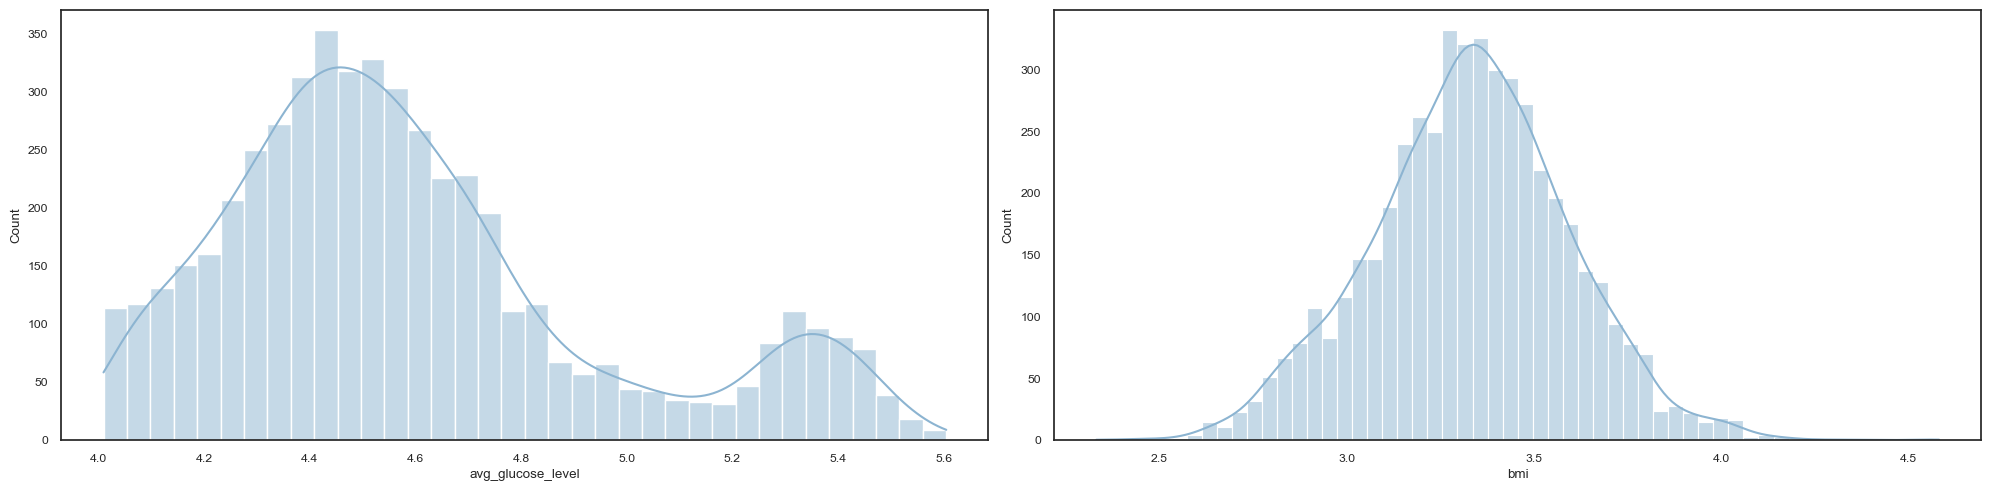

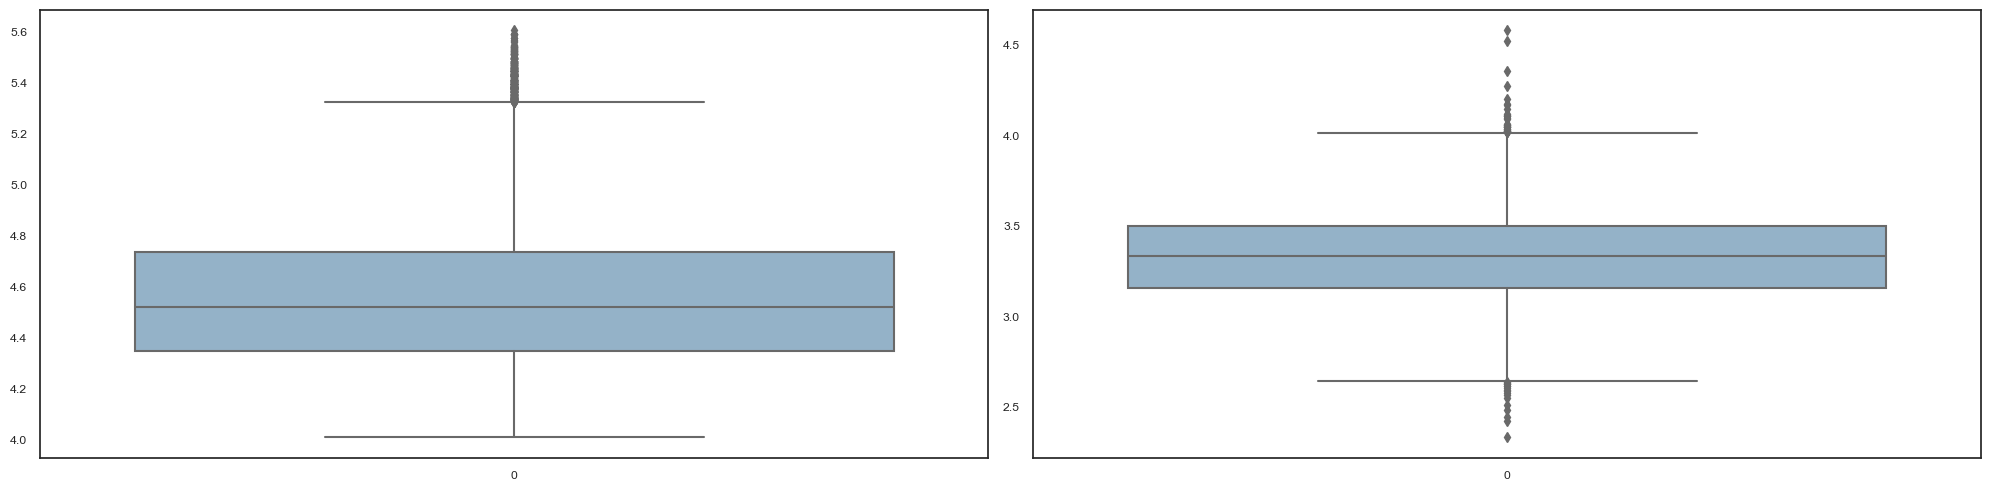

In [ ]:
# Apply log transformation to reduce skewness
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
data['bmi'] = np.log(data['bmi'])

# Check for outliers in 'avg_glucose_level' and 'bmi' after transformation
outliers_transformed = {column: count_outliers(data[column]) for column in ['avg_glucose_level', 'bmi']}

print(outliers_transformed)

# List of continuous variables
continuous_variables = ['avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(data[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(data[var], ax=subplot)

plt.tight_layout()
plt.show()

The **log transformation** has reduced the number of outliers in the `avg_glucose_level` and `bmi` columns. The `avg_glucose_level` column now has **380** outliers (down from 627), and the `bmi` column now has **88** outliers (down from 126). This is a significant improvement.

Next, let's handle the categorical variables.

For the `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` columns, we should check if they contain any unexpected categories.


Then, we'll convert these categorical variables to numerical format so they can be used in machine learning algorithms. We'll use one-hot encoding, which creates a new binary column for each category in the original column.

Let's first check the unique values in these categorical columns.


In [ ]:
# Check unique values in categorical columns
unique_values_categorical = {column: data[column].unique() for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']}

The unique values in the categorical columns are as follows:

1. **`gender`**: ['Male', 'Female', 'Other']

2. **`ever_married`**: ['Yes', 'No']

3. **`work_type`**: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']

4. **`Residence_type`**: ['Urban', 'Rural']

5. **`smoking_status`**: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']


All of these values are expected except for 'Other' in the 'gender' column and 'Unknown' in the 'smoking_status' column.

- The 'Other' gender category could represent non-binary or other gender identities. Depending on the analysis, we might want to handle this category differently. For instance, if the number of 'Other' instances is very small, it might make sense to group them into one of the existing categories or create a separate category for them.

- The 'Unknown' category in the 'smoking_status' column indicates missing data. Depending on the analysis, we might want to handle this category differently. If the number of 'Unknown' instances is very small, it might make sense to group them into one of the existing categories, create a separate category for them, or even remove these instances.

Let's see how many instances we have for 'Other' in 'gender' and 'Unknown' in 'smoking_status'.



In [ ]:
# Count the number of 'Other' instances in 'gender' and 'Unknown' instances in 'smoking_status'
other_gender_count = (data['gender'] == 'Other').sum()
unknown_smoking_status_count = (data['smoking_status'] == 'Unknown').sum()

other_gender_count, unknown_smoking_status_count

(1, 1544)

There is only 1 instance with `Other` for `gender`, and there are 1544 instances with `Unknown` for `smoking_status`.

Given that the `Other` gender category has only one instance, it might make sense to drop this row, as it's unlikely to have a significant impact on our analysis.

<b>Note:</b>
For the `Unknown` category in `smoking_status`, since we have a relatively large number of instances (1544), it would not be appropriate to simply drop these rows. Instead, we could treat `Unknown` as a separate category. This would make sense if we interpret `Unknown` as representing individuals for whom we don't have smoking information, rather than as missing data.


Let's proceed with these actions. We'll drop the row with `Other` for `gender` and treat `Unknown` in `smoking_status` as a separate category. Then, we'll convert the categorical variables to numerical format using one-hot encoding.


In [ ]:
# Drop the row with 'Other' for 'gender'
data = data[data['gender'] != 'Other']

# Convert categorical variables to numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [ ]:
data_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,5.432367,3.600048,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,5.309307,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,4.662684,3.481240,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,5.143008,3.538057,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,5.159745,3.178054,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


We have successfully converted the categorical variables to numerical format using one-hot encoding.

The resulting dataset contains binary (0 or 1) columns for each category of the original categorical columns. For instance, the `gender` column has been replaced with `gender_Female` and `gender_Male`, the `ever_married` column has been replaced with `ever_married_No` and `ever_married_Yes`, and so on.

Finally, let's check for incorrect values in our dataset. For example, `age` should not be negative, `hypertension` and `heart_disease` should be 0 or 1, etc. We have already checked for negative values when we did the log transformation, so we can skip that part. Let's check the `hypertension`, `heart_disease`, and `stroke` columns to ensure they only contain 0 or 1.


In [ ]:
# Check unique values in 'hypertension', 'heart_disease', and 'stroke'
unique_values_binary = {column: data[column].unique() for column in ['hypertension', 'heart_disease', 'stroke']}

unique_values_binary

{'hypertension': array([0, 1], dtype=int64),
 'heart_disease': array([1, 0], dtype=int64),
 'stroke': array([1, 0], dtype=int64)}

The unique values in the binary columns are as follows:

- 'hypertension': [0, 1]

- 'heart_disease': [1, 0]

- 'stroke': [1, 0]

These are as expected, with each column containing only the values 0 and 1.

<b>DATA CLEANSING RECAP</b>


So, to recap, we have performed the following data cleansing steps on our dataset:

1. **Handled missing values** by filling them in with the median of the column. This ensures that we have complete data for analysis and modeling. ✅

2. **Checked for and found no duplicate rows**. This assures us that each entry in the dataset is unique and avoids any redundancy or bias in our analysis.

3. **Identified and reduced the impact of outliers** in the `avg_glucose_level` and `bmi` columns using a log transformation. By applying a log transformation, we have mitigated the influence of extreme values and made the data more suitable for analysis.

4. **Checked for unexpected categories in categorical variables**, handled the 'Other' category in the `gender` column by dropping the corresponding row, and handled the 'Unknown' category in the `smoking_status` column by treating it as a separate category. This ensures that our categorical variables are well-defined and aligned with our analysis objectives.

5. **Converted categorical variables to numerical** format using one-hot encoding. This transformation allows us to include categorical variables in our analysis by representing them as binary indicator variables, enabling the use of mathematical models.

6. **Checked for incorrect values in binary columns and found none**. This ensures the integrity of our binary variables, such as `hypertension`, `heart_disease`, and `stroke`, which play a crucial role in our analysis and modeling.

By completing these data cleansing steps, our dataset is now clean and ready for further analysis or model building. We can confidently proceed with exploring relationships, conducting statistical analyses, or training predictive models on this refined dataset.



## Consolidating Everything

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4058228/pexels-photo-4058228.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> RE-CAP</span></b> </div>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

##-------DATA CLEANSING-------##

# Fill missing values in the 'bmi' column with its median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Merge 'Other' with the most frequent category in the 'gender' column
most_frequent_gender = df['gender'].value_counts().idxmax()
df['gender'] = df['gender'].replace('Other', most_frequent_gender)


##-------DATA PREPARATION-------##

# Mapping values and replacing them in the 'ever_married' column
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

# Perform one-hot encoding on the categorical variables
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
# Drop the 'id' column
df_encoded = df_encoded.drop(columns='id')

#-------feature engineering------#

# Define functions for feature engineering
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 65:
        return 'Adult'
    else:
        return 'Senior'

def compute_health_risk_score(row):
    score = 0
    if row['age_category'] == 'Senior':
        score += 1
    if row['hypertension'] == 1:
        score += 1
    if row['heart_disease'] == 1:
        score += 1
    if row['bmi_category'] in ['Overweight', 'Obese']:
        score += 1
    if row['smoking_status_smokes'] == 1:
        score += 1
    return score

# Apply functions to create new features
df_encoded['bmi_category'] = df_encoded['bmi'].apply(categorize_bmi)
df_encoded['age_category'] = df_encoded['age'].apply(categorize_age)
df_encoded['health_risk_score'] = df_encoded.apply(compute_health_risk_score, axis=1)

# Perform one-hot encoding on the new categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['bmi_category', 'age_category'])

# Check class distribution in the target variable
df_encoded['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4058228/pexels-photo-4058228.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Making a Prediction </span></b> </div>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [ ]:
# Define the features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4058228/pexels-photo-4058228.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Apply the Model</span></b> </div>

In [ ]:
# Define the model with the optimal hyperparameters
model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.7,
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4058228/pexels-photo-4058228.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Classification Report</span></b> </div>

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.18      0.77      0.30        62

    accuracy                           0.78      1022
   macro avg       0.58      0.78      0.58      1022
weighted avg       0.93      0.78      0.83      1022



### Intepret the Results 🚂

The results from the classification report are promising, but there is definitely room for improvement.

- **Precision** measures the accuracy of positive predictions. The model has a high precision (0.98) for predicting no stroke, meaning that when the model predicts that a patient will not have a stroke, it is correct 98% of the time. However, the precision is much lower for predicting stroke (0.18), meaning that when the model predicts a stroke, it is correct only 18% of the time.

- **Recall** (also known as sensitivity or true positive rate) measures the fraction of positives that were correctly identified. The model has a recall of 0.77 for no stroke and 0.78 for stroke. This means that the model correctly identifies 78% of the patients who will not have a stroke and 77% of the patients who will have a stroke. The lower recall for stroke indicates that the model is missing a large number of patients who will have a stroke.

- The **F1 score** is a weighted average of precision and recall. The F1 scores for no stroke and stroke are 0.87 and 0.30, respectively. The low F1 score for stroke indicates that the model's performance is poor when it comes to predicting stroke.

- The **accuracy** of the model is 0.78, which means that the model correctly predicts whether a patient will have a stroke or not in 85% of the cases. However, accuracy can be misleading when dealing with imbalanced classes, as it is in this case.

- The **macro average** calculates the metric independently for each class and then takes the average. This means that all classes are equally important, which is not the case in this scenario where stroke prediction is more critical.

- The **weighted average** calculates metrics for each label, and finds their average weighted by the number of true instances for each label. This alters 'macro' to account for label imbalance.


<b> Here are some observations:</b>
    
The model is performing well in predicting the 'No Stroke' class but is struggling to accurately predict the 'Stroke' class. This is a critical issue since failing to predict a stroke could have serious health implications for the patient.


<b>Recommendation: </b>
It's recommended to further fine-tune the model, possibly by exploring different algorithms, oversampling the minority class, and/or engineering new features. The focus should be on improving the recall for the 'Stroke' class without significantly compromising the precision.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4058228/pexels-photo-4058228.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Apply the Model</span></b> </div>

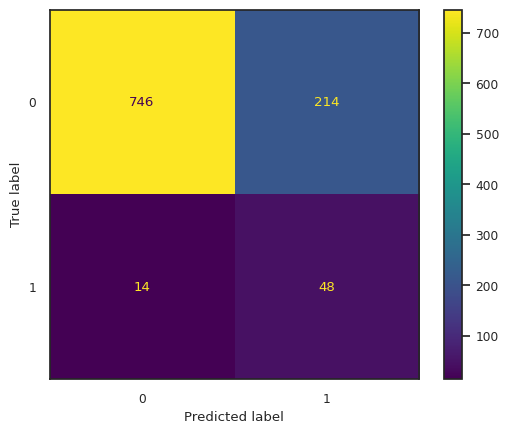

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()


### Intepret the Results 🚂

Looking at the confusion matrix, we can see the detailed performance of the model:

- **True negatives (top left square):** This is the number of cases in which the model correctly predicted 'No Stroke'. There are 746 true negatives, which means the model correctly predicted that 746 patients would not have a stroke.

- **False positives (top right square):** This is the number of cases in which the model incorrectly predicted 'Stroke'. There are 214 false positives, meaning the model predicted that 214 patients would have a stroke when they actually did not.

- **False negatives (bottom left square):** This is the number of cases in which the model incorrectly predicted 'No Stroke'. There are 14 false negatives, which means the model predicted that 14 patients would not have a stroke when they actually did.

- **True positives (bottom right square):** This is the number of cases in which the model correctly predicted 'Stroke'. There are 48 true positives, which means the model correctly predicted that 48 patients would have a stroke.

<b>Here are some observations:</b>
    
The number of false negatives is quite low compared to the number of true positives, which is good because false negatives are more dangerous in this case (predicting no stroke when a patient will actually have a stroke). However, the number of false positives is quite high compared to the number of true negatives, which suggests that the model is over-predicting the 'Stroke' class.


<b>Recommendation: </b>
The goal should be to minimize false negatives as much as possible to avoid under-predicting the 'Stroke' class, while also reducing false positives to avoid over-predicting the 'Stroke' class. This could potentially be achieved by further tuning the model's parameters, exploring different algorithms, or engineering new features.




## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/4058228/pexels-photo-4058228.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Apply the Model</span></b> </div>

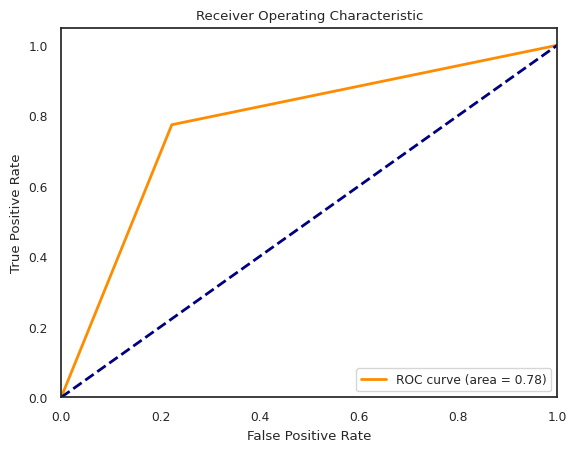

In [ ]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Intepret the Results 🚂

The Receiver Operating Characteristic (ROC) curve is a plot that shows the trade-off between the true positive rate (TPR) and false positive rate (FPR) for every possible classification threshold.

- **Area Under the Curve (AUC):** The AUC value is 0.78. The AUC value is an aggregate measure of the model's performance across all classification thresholds. An AUC of 0.5 suggests no discrimination (i.e., ability to distinguish the classes), 1 indicates perfect discrimination, and 0 implies perfect discrimination but in the opposite direction. Hence, an AUC of 0.78 indicates a fair discrimination.

<b>Here are some observations:</b>
    
With an AUC of 0.78, the model has a fair discrimination capacity, but it is far from perfect. This suggests that the model has a reasonable ability to distinguish between patients who will have a stroke and those who will not.





### Suggestions for Future Work


1. **Collect More Data:**  More data, especially for the under-represented 'Stroke' class, could potentially improve the model's learning and its ability to generalize to unseen data. This could include more diverse patient data or additional types of data related to stroke risk.

2. **Try Different Models:** Different machine learning models have different strengths and weaknesses, and some may be better suited to this task than others. Consider trying different types of models, such as logistic regression, support vector machines, neural networks, or ensemble methods.

3. **Feature Engineering:**  The current model uses a fairly basic set of features. Additional features or transformations of the existing features could help improve the model's predictive power. For example, you could create interaction features, polynomial features, or use domain knowledge to create new features.

4. **Tune Hyperparameters:** Most machine learning models have hyperparameters that can be tuned to improve performance. Consider using techniques like grid search or randomized search to find the optimal hyperparameters for your model.

5. **Address Class Imbalance:** The dataset has an imbalance between the 'Stroke' and 'No Stroke' classes, which can make it more challenging for the model to learn to predict the minority class. Techniques such as oversampling the minority class, undersampling the majority class, or using synthetic minority over-sampling technique (SMOTE) could help address this issue.

6. **Regularization:** To prevent overfitting, consider using regularization techniques which can help in creating a simpler model.

